In [ ]:
# Library
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import streamlit as st
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir = "/content/drive/MyDrive/dataset/hungarian-data/hungarian.data"
with open (dir, encoding='Latin1') as file:
    lines = [line.strip() for line in file]
lines[0:10]


['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

In [ ]:
import itertools

# Nama file
dir = "/content/drive/MyDrive/dataset/hungarian-data/hungarian.data"

# Membaca file dengan encoding Latin1
with open(dir, encoding='Latin1') as file:
    lines = [line.strip() for line in file]

# Menampilkan 10 baris pertama dari lines untuk pengecekan
lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

In [ ]:
data = itertools.takewhile(
  lambda x: len(x) == 76,
  (' '.join(lines[i:(i + 10)]).split() for i in range(0, len(lines), 10))
)

df = pd.DataFrame.from_records(data)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

In [ ]:
df = df.iloc[:,:-1]
df = df.drop(df.columns[0], axis=1)

In [ ]:
df = df.astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

In [ ]:
df.replace(-9, np.nan, inplace=True)


In [ ]:
selected_columns = df.iloc[:, [1, 2, 7, 8, 10, 14, 17, 30, 36, 38, 39, 42, 49, 56]]

# Memberikan nama pada masing-masing kolom
selected_columns.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Menampilkan 5 baris pertama dari DataFrame yang telah dipilih
selected_columns.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [ ]:
df = selected_columns
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [ ]:
df.value_counts()

,,,,,,,,,,,,,,count
age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,
47.0,1.0,4.0,150.0,226.0,0.0,0.0,98.0,1.0,1.5,2.0,0.0,7.0,1.0,1


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,1
chol,23
fbs,8
restecg,1
thalach,1
exang,1
oldpeak,0


In [ ]:
columns_to_drop = ['ca', 'thal','slope']
df = df.drop(columns=columns_to_drop, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,1
chol,23
fbs,8
restecg,1
thalach,1
exang,1
oldpeak,0


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,0.0


In [ ]:
df = df.dropna()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
5,39.0,1.0,3.0,120.0,339.0,0.0,0.0,170.0,0.0,0.0,0.0


In [ ]:
df.isnull().sum()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
5,39.0,1.0,3.0,120.0,339.0,0.0,0.0,170.0,0.0,0.0,0.0


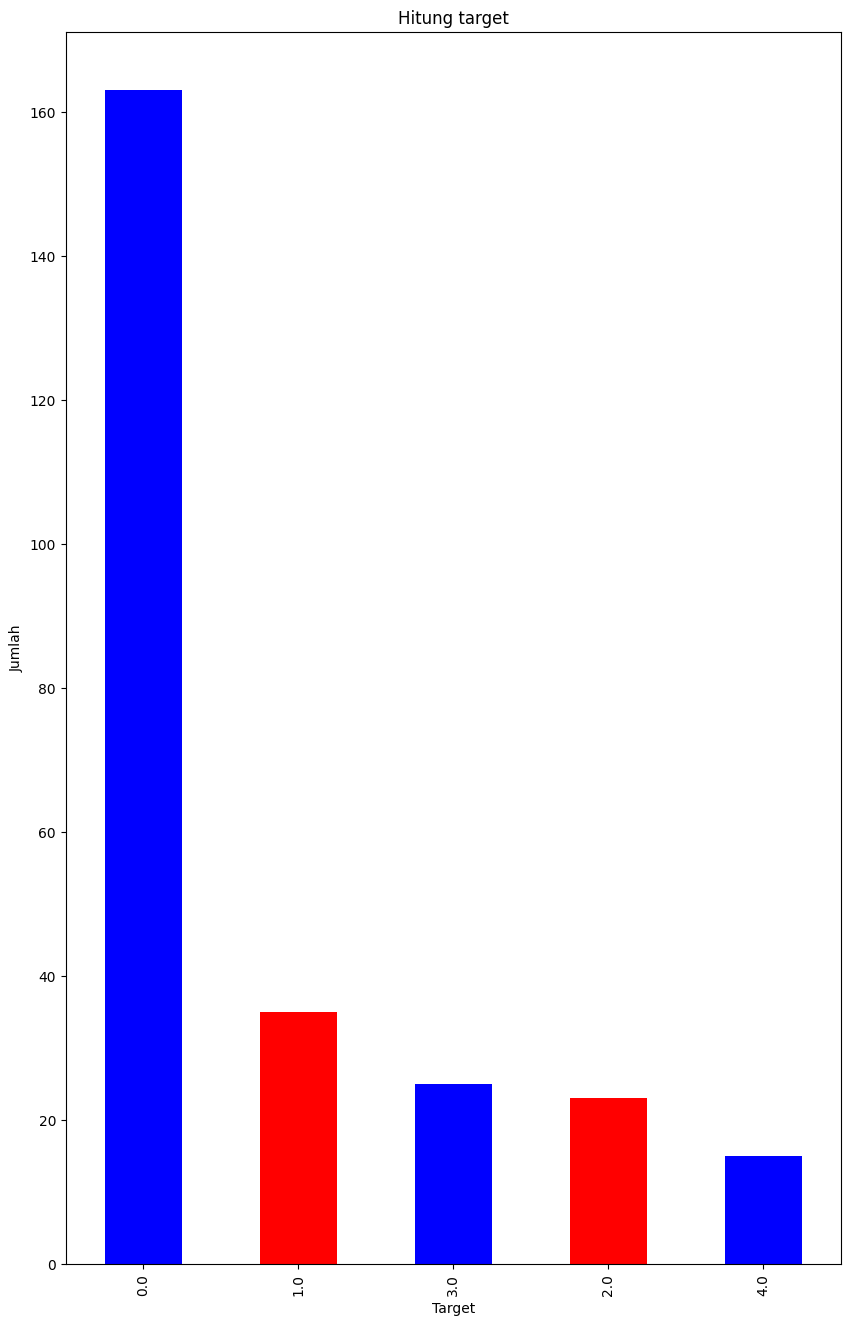

In [ ]:
df['target'].value_counts().plot(kind='bar',figsize=(10,16),color=['blue','red'])
plt.title('Hitung target')
plt.xlabel('Target')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
X=df.drop('target',axis=1).values
y=df.iloc[:,-1]

In [ ]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

<ipython-input-26-0aac10df29ec>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette=['blue', 'red'])
<ipython-input-26-0aac10df29ec>:23: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=y, palette=['blue', 'red'])


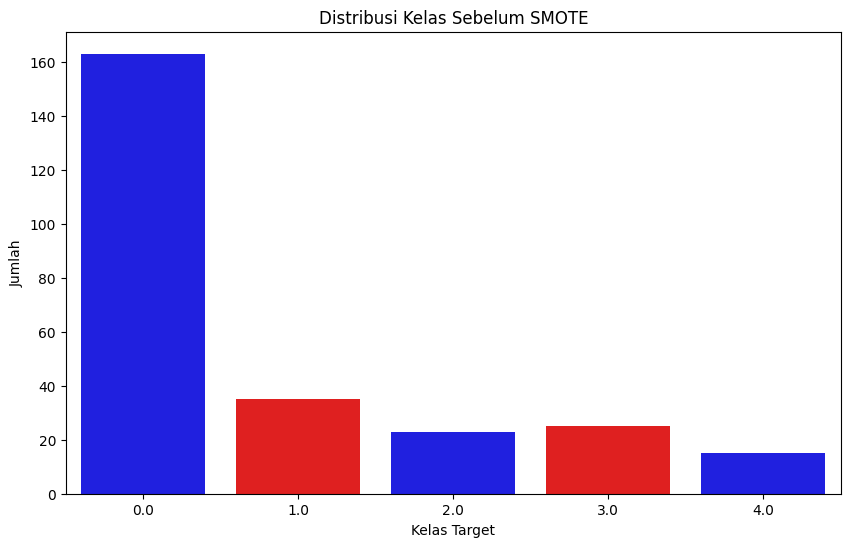

<ipython-input-26-0aac10df29ec>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_smote_resampled, palette=['blue', 'red'])
<ipython-input-26-0aac10df29ec>:31: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=y_smote_resampled, palette=['blue', 'red'])


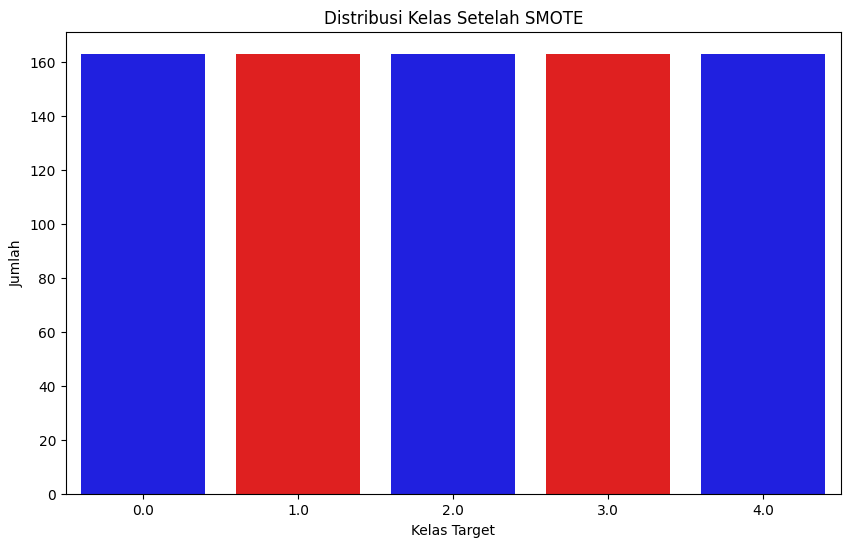

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd

# Asumsikan df sudah didefinisikan dan dipisahkan menjadi X dan y
# X = df.drop('target', axis=1).values
# y = df.iloc[:, -1].values

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Menerapkan SMOTE untuk oversampling
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)

# Membuat DataFrame dari dataset yang telah di-resample
df_resampled = pd.DataFrame(X_smote_resampled, columns=df.drop('target', axis=1).columns)
df_resampled['target'] = y_smote_resampled

# Plot distribusi kelas sebelum SMOTE
plt.figure(figsize=(10, 6))
sns.countplot(x=y, palette=['blue', 'red'])
plt.title('Distribusi Kelas Sebelum SMOTE')
plt.xlabel('Kelas Target')
plt.ylabel('Jumlah')
plt.show()

# Plot distribusi kelas setelah SMOTE
plt.figure(figsize=(10, 6))
sns.countplot(x=y_smote_resampled, palette=['blue', 'red'])
plt.title('Distribusi Kelas Setelah SMOTE')
plt.xlabel('Kelas Target')
plt.ylabel('Jumlah')
plt.show()


In [ ]:
y_res = y_smote_resampled
X_res = X_smote_resampled


## OPSIONAL
# Normalisasi atau standarisasi fitur jika diperlukan
scaler = StandardScaler()
X_res = scaler.fit_transform(X_res)

# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [ ]:
# SVM
from sklearn import svm
sv = svm.SVC(kernel='linear')
sv.fit(X_train, y_train)
Y_pred_svm = sv.predict(X_test)

score_svm = round(accuracy_score(Y_pred_svm,y_test)*100,2)
print("Akurasi : "+str(score_svm)+" %")

Akurasi : 62.58 %


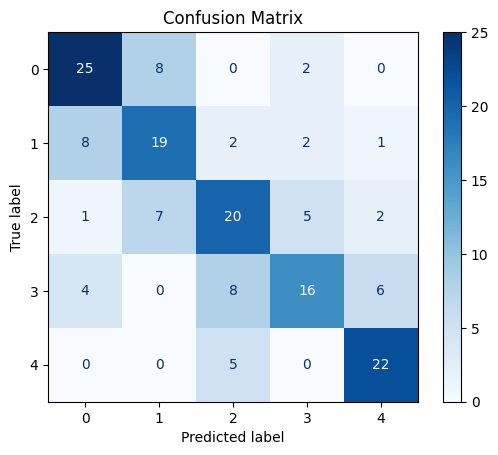

In [ ]:

cm = confusion_matrix(y_test, Y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
Y_pred_knn=knn.predict(X_test)

score_knn = round(accuracy_score(Y_pred_knn,y_test)*100,2)

print("Akurasi : "+str(score_knn)+" %")

Akurasi : 88.34 %


In [ ]:
# DECISON TREE
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(500):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
Y_pred_dt = dt.predict(X_test)

score_dt = round(accuracy_score(Y_pred_dt,y_test)*100,2)

print("Akurasi : "+str(score_dt)+" %")

Akurasi : 77.91 %


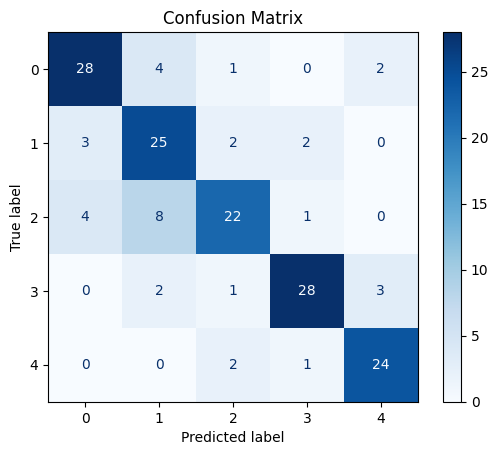

In [ ]:
# Membuat confusion matrix model Decision Tree
cm = confusion_matrix(y_test, Y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
scores = [score_svm,score_knn,score_dt]
algorithms = ["Support Vector Machine","K-Nearest Neighbors","Decision Tree"]

for i in range(len(algorithms)):
    print("Akurasi Model "+algorithms[i]+" : "+str(scores[i])+" %")

Akurasi Model Support Vector Machine : 62.58 %
Akurasi Model K-Nearest Neighbors : 88.34 %
Akurasi Model Decision Tree : 77.91 %


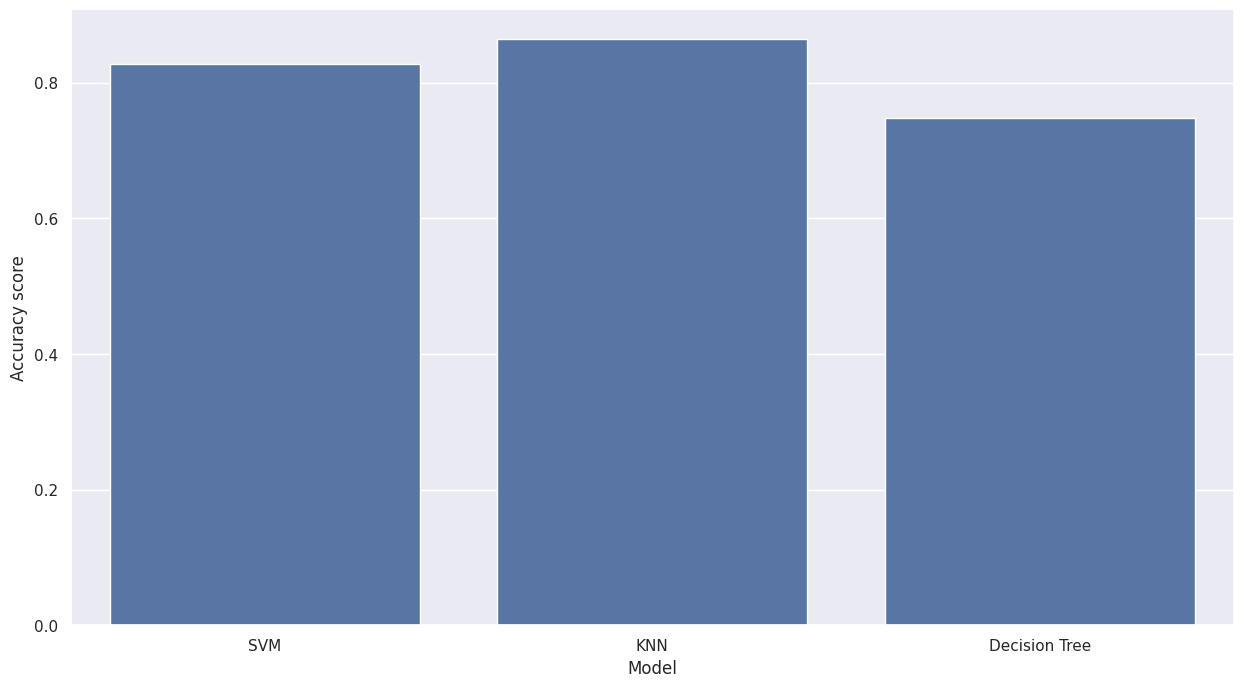

In [ ]:
# Membangun dan mengevaluasi berbagai model klasifikasi
models = {
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Menyimpan hasil akurasi
results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((model_name, accuracy))

# Membuat DataFrame dari hasil
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])

# Membuat barplot
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Model")
plt.ylabel("Accuracy score")
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.show()

In [ ]:
# from pyngrok import ngrok

# # Menjalankan Streamlit
# !streamlit run app.py &

# # Membuat terowongan ke aplikasi Streamlit
# public_url = ngrok.connect(port='8501')
# print(f"Aplikasi Streamlit dapat diakses di: {public_url}")

ModuleNotFoundError: No module named 'pyngrok'